source: [Exploring U.S. Traffic Fatality Data](http://blog.yhathq.com/posts/traffic-fatalities-in-us.html)

In [10]:
from __future__ import division, print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# Load the data into DataFrame
fatality_frame = pd.read_csv('data/accident.csv')

In [3]:
# Number of traffic fatalities in the US in 2012
total_traffic_fatalities = fatality_frame.FATALS.sum()
print('2012 Traffic Fatalities:', total_traffic_fatalities)

2012 Traffic Fatalities: 33561


### Fatality rates by injury

In [4]:
# Get the rates
cdc_injury_frame = pd.read_csv('data/cdc_injuries_2010.txt', delimiter='\t')

In [5]:
cdc_injury_frame.head()

,Notes,Injury Mechanism & All Other Leading Causes,Injury Mechanism & All Other Leading Causes Code,Deaths,Population,Crude Rate
0,NaN,Cut/Pierce,GRINJ-001,2598,308745538,0.8
1,NaN,Drowning,GRINJ-002,4521,308745538,1.5
2,NaN,Fall,GRINJ-003,26852,308745538,8.7
3,NaN,Fire/Flame,GRINJ-004,3127,308745538,1.0
4,NaN,Hot object/Substance,GRINJ-005,67,308745538,0.0


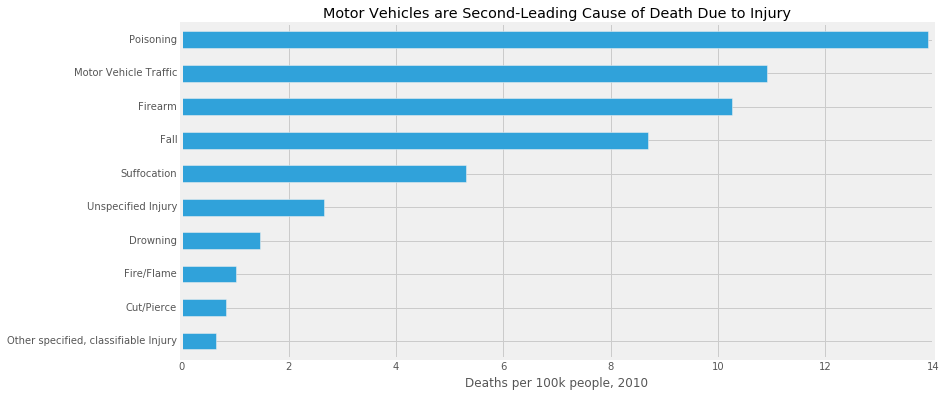

In [61]:
cdc_injury_frame['Rate'] = cdc_injury_frame.Deaths / (cdc_injury_frame.Population / 100000)

cdc_rates = cdc_injury_frame.set_index('Injury Mechanism & All Other Leading Causes')['Rate']\
            .sort_values(ascending=False)

# Plot the top 10
"""
To plot barh in descending order:
    cdc_rates.sort_values(ascending=True).iloc[-10:].plot(kind="barh")  # take the last 10
or
    ax = cdc_rates.sort_values(ascending=False).iloc[:10].plot(kind="barh")
    ax.invert_yaxis()
"""

plt.figure(figsize=(12, 6))
ax = cdc_rates.iloc[:10].plot(kind='barh', title='Motor Vehicles are Second-Leading Cause of Death Due to Injury')
ax.invert_yaxis()
plt.xlabel('Deaths per 100k people, 2010')
plt.ylabel('')
plt.show();

### Major post-WWII conflicts vs traffic fatalities

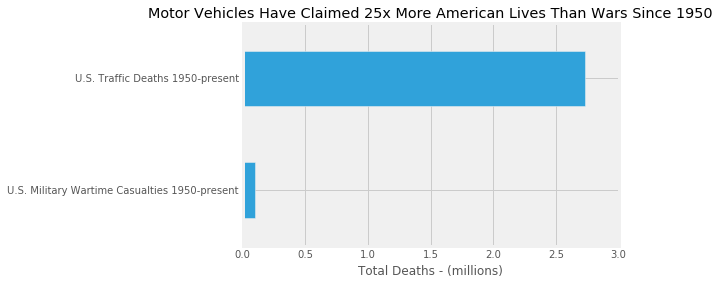

In [43]:
# US casualties by conflict (all deaths - KIA and other)
us_war_casualties = {'Korea': 36574,
                     'Vietname': 58220,
                     'Persian Gulf': 383,
                     'Irag': 4424,
                     'Afganistan': 2215}

us_traffic_deaths_1950_2015 = 2729062

trf_mil_deaths = pd.DataFrame.from_dict({'U.S. Military Wartime Casualties 1950-present': sum(us_war_casualties.values()),
                                         'U.S. Traffic Deaths 1950-present': us_traffic_deaths_1950_2015}, orient='index')

# Plot the data
# take column 0, sort in ascending order (so that the barh is descending)
ax = trf_mil_deaths[0].sort_values().plot(kind='barh')
plt.title('Motor Vehicles Have Claimed 25x More American Lives Than Wars Since 1950')
plt.xlabel('Total Deaths - (millions)')

def formatfunc(tick_loc, tick_num):
    return '{}'.format(tick_loc / 1000000)

# set the major formatter for the x-axis
ax.xaxis.set_major_formatter(plt.FuncFormatter(formatfunc))
plt.show();

### U.S. Roads Much More Deadly Than International Counterparts

In [46]:
wvf = pd.read_csv('data/world_death_rates.csv', index_col=0)

wvf.head()

,Death_Rate
Country,
Australia,6.1
Canada,6.8
France,6.4
Germany,4.7
Japan,5.2


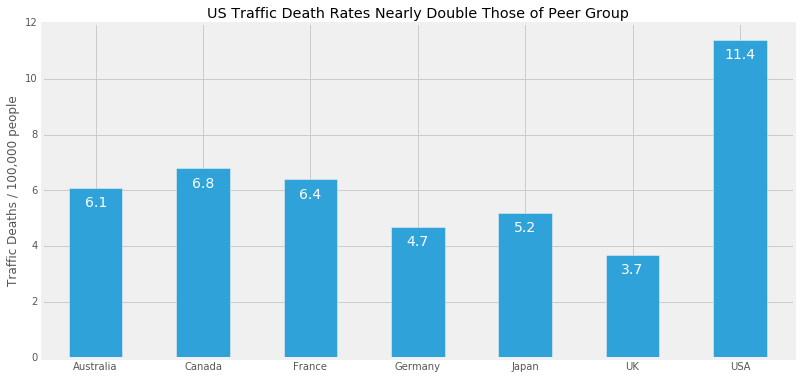

In [62]:
ax = wvf.plot(kind='bar', rot=0, figsize=(12,6), legend=False)
plt.title('US Traffic Death Rates Nearly Double Those of Peer Group')
plt.ylabel('Traffic Deaths / 100,000 people')
plt.xlabel('')

rects = ax.patches

def autolabel(rects):
    """Attach some labels."""
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2, height-.3, '{:.1f}'.format(height),
                ha='center', va='top', fontsize=14, color='w')

autolabel(rects);

In [64]:
# Load FARS fatality time series
ftf = pd.read_csv('data/fatal_trends.txt', delimiter='\t')
ftf.set_index('Year', inplace=True)

ftf.head()

,Fatalities,Resident Population (Thousands),"Fatality Rate per 100,000 Population",Licensed Drivers (Thousands),"Fatality Rate per 100,000 Licensed Drivers",Registered Motor Vehicles (Thousands),"Fatality Rate per 100,000 Registered Vehicles",Vehicle Miles Traveled (Billions),Fatality Rate per 100 Million VMT,Unnamed: 10
Year,,,,,,,,,,
1994,40716,260327,15.64,175403,23.21,192497,21.15,2358,1.73,NaN
1995,41817,262803,15.91,176628,23.68,197065,21.22,2423,1.73,NaN
1996,42065,265229,15.86,179539,23.43,201631,20.86,2484,1.69,NaN
1997,42013,267784,15.69,182709,22.99,203568,20.64,2552,1.65,NaN
1998,41501,270248,15.36,184861,22.45,208076,19.95,2628,1.58,NaN


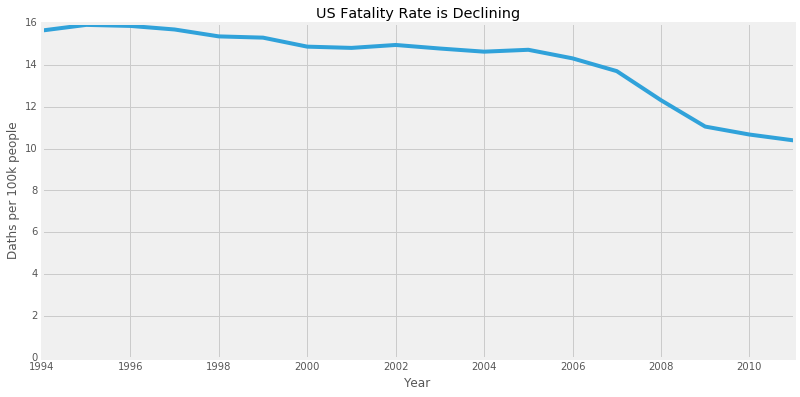

In [65]:
ftf['Fatality Rate per 100,000 Population'].plot(figsize=(12,6), ylim=0)
plt.title('US Fatality Rate is Declining')
plt.ylabel('Daths per 100k people');

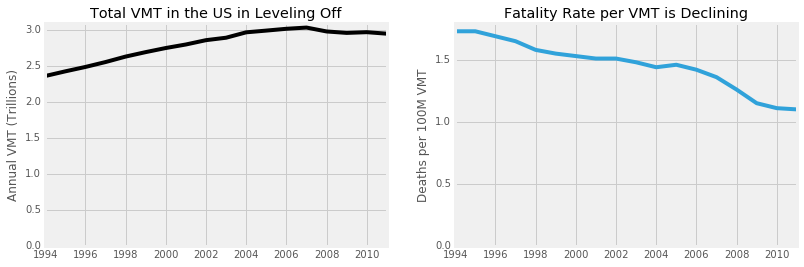

In [67]:
# VMT == Vehicle Miles Travelled
ftf['VMT (Trillions)'] = ftf['Vehicle Miles Traveled (Billions)'] / 1000

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ftf['VMT (Trillions)'].plot(ax=ax1, title='Total VMT in the US in Leveling Off', color='black', ylim=0)
ax1.set_xlabel('')
ax1.set_ylabel('Annual VMT (Trillions)')

ftf['Fatality Rate per 100 Million VMT'].plot(ax=ax2, title='Fatality Rate per VMT is Declining', ylim=0)
ax2.set_xlabel('')
ax2.set_ylabel('Deaths per 100M VMT');

### Drunk Driving

In [68]:
# Number of fatalities in crashes involving a drunken driver
drunk_driver_fatalities = fatality_frame.FATALS[fatality_frame.DRUNK_DR >= 1].sum()

print('Fatalities involving a drunk driver:', drunk_driver_fatalities)
print('Percent of total traffic fatalities involving drunk driver',
      '{:.1f}%'.format(drunk_driver_fatalities / total_traffic_fatalities * 100))

Fatalities involving a drunk driver: 10161
Percent of total traffic fatalities involving drunk driver 30.3%


In [73]:
# pandas DataFrame pivot by hour that crash occured and drunk driving
fatal_pivot = fatality_frame.pivot_table(index=['HOUR'], columns=['DRUNK_DR'], values='FATALS', aggfunc=np.sum)

fatal_pivot.iloc[range(3) + [-3, -2, -1]]

DRUNK_DR,0,1,2,3,4
HOUR,,,,,
0,583,776,32,NaN,NaN
1,505,818,30,1,NaN
2,511,951,55,NaN,NaN
22,859,606,20,2,NaN
23,710,708,14,NaN,NaN
99,132,124,4,NaN,NaN


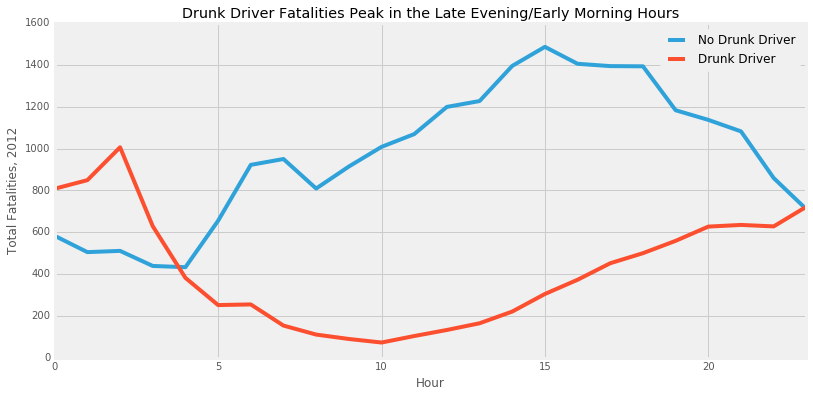

In [74]:
# Sum the total number of drunk drivers involved
fatal_pivot['DRUNK_DR_SUM'] = fatal_pivot[[1,2,3,4]].sum(axis=1)

fp = fatal_pivot[[0, 'DRUNK_DR_SUM']].iloc[:-1].copy()
fp.columns = ['No Drunk Driver', 'Drunk Driver']

fp.plot(figsize=(12,6))
plt.title('Drunk Driver Fatalities Peak in the Late Evening/Early Morning Hours')
plt.xlabel('Hour')
plt.ylabel('Total Fatalities, 2012');

In [75]:
# Now look at day of week
fatal_pivot = fatality_frame.pivot_table(index=['DAY_WEEK'], columns=['DRUNK_DR'], values='FATALS', aggfunc=np.sum)

# Sum the total number of drunk drivers involved
fatal_pivot['DRUNK_DR_SUM'] = fatal_pivot[[1,2,3,4]].sum(axis=1)
fp = fatal_pivot[[0, 'DRUNK_DR_SUM']].copy()
fp.columns = ['No Drunk Driver', 'Drunk Driver']

fp

,No Drunk Driver,Drunk Driver
DAY_WEEK,,
1,3231,2357
2,3184,1037
3,3108,898
4,3271,956
5,3242,1035
6,3653,1387
7,3711,2491


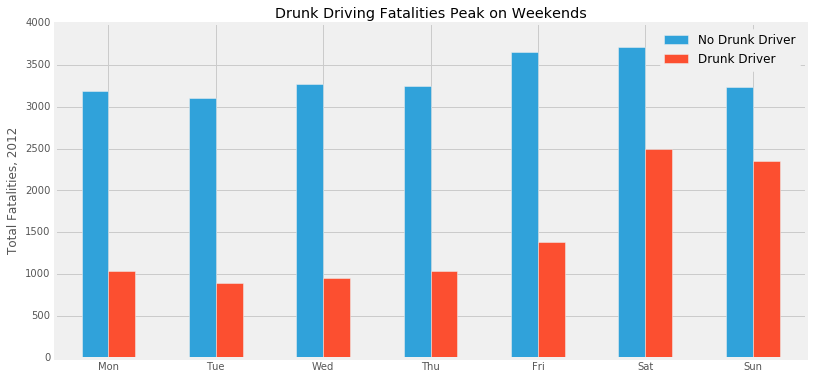

In [79]:
# Days of week are indexed 1=Sunday, 2=Monday, ..., 6=Saturday
labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
fp.index = labels
fp = fp.reindex(index=labels[1:]+['Sun'])

fp.plot(kind='bar', figsize=(12,6), rot=0)
plt.title('Drunk Driving Fatalities Peak on Weekends')
plt.ylabel('Total Fatalities, 2012');

### Weather Conditions

In [82]:
weather_group = fatality_frame.groupby('WEATHER')['FATALS'].sum()

weather_group

WEATHER
1     24723
2      2246
3        73
4       375
5       413
6        66
7        13
8        39
10     5319
11       25
98       73
99      196
Name: FATALS, dtype: int64

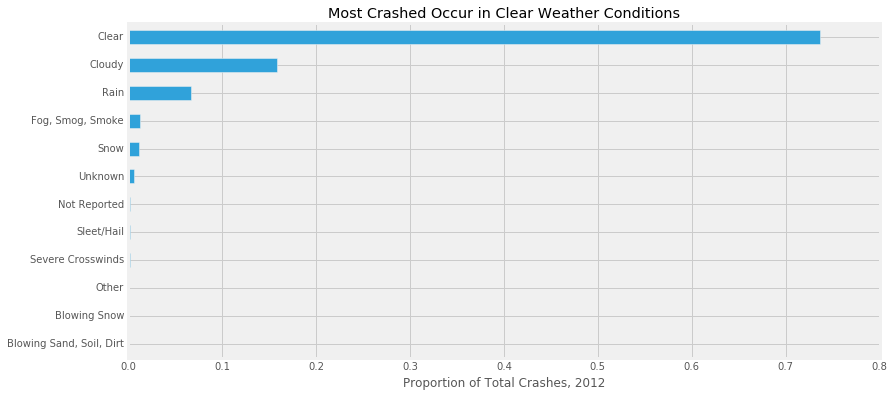

In [84]:
labels = ['Clear', 'Rain', 'Sleet/Hail', 'Snow', 'Fog, Smog, Smoke',
          'Severe Crosswinds', 'Blowing Sand, Soil, Dirt', 'Other',
          'Cloudy', 'Blowing Snow', 'Not Reported', 'Unknown']
weather_group.index = labels

(weather_group.sort_values() / weather_group.sum()).plot(kind='barh', figsize=(12,6))
plt.title('Most Crashed Occur in Clear Weather Conditions')
plt.xlabel('Proportion of Total Crashes, 2012');

In [86]:
light_group = fatality_frame.groupby('LGT_COND')['FATALS'].sum()

light_group

LGT_COND
1    16250
2     9560
3     6056
4      608
5      749
6      172
7        9
8       26
9      131
Name: FATALS, dtype: int64

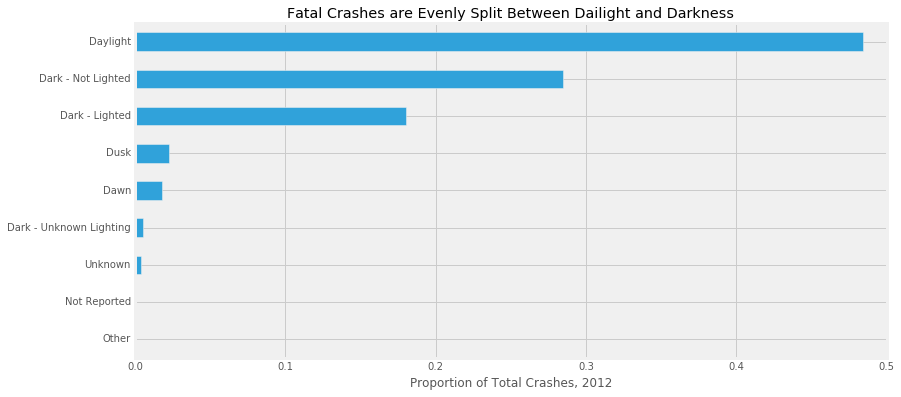

In [88]:
labels = ['Daylight','Dark - Not Lighted', 'Dark - Lighted',
          'Dawn', 'Dusk', 'Dark - Unknown Lighting', 'Other',
          'Not Reported', 'Unknown']
light_group.index = labels

(light_group.sort_values() / light_group.sum()).plot(kind='barh', figsize=(12,6))
plt.title('Fatal Crashes are Evenly Split Between Dailight and Darkness')
plt.xlabel('Proportion of Total Crashes, 2012');